<a href="https://colab.research.google.com/github/dgbaenar/deep-learning-with-tensorflow/blob/main/Learning_Tensorflow_Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1. Language model - Predicting movie likes or dislikes

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


The variables train_data and test_data are lists of reviews; each review is a list of word indices (encoding a sequence of words). train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive

In [ ]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
word_index = imdb.get_word_index()                                
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])       
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


In [ ]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Encoding the integer sequences via multi-hot encoding

In [ ]:
import numpy as np 


def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))   
    for i, sequence in enumerate(sequences):
        for j in sequence:
          # The reason because some numbers of the output are zero, it's
          # because we are marking indices of the list, and those indices depends
          # on each value of each list in the input sequence
            results[i, j] = 1.                        
    return results


x_train = vectorize_sequences(train_data)             
x_test = vectorize_sequences(test_data) 

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
len(x_train[0])

10000

In [ ]:
x_train[0][:10]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1.])

In [ ]:
for i, j in enumerate(train_data):
  print(i, j)
  break

0 [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


## Model Definition

In [ ]:
from tensorflow import keras 
from tensorflow.keras import layers
  
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.5349 - accuracy: 0.7799 - val_loss: 0.4138 - val_accuracy: 0.8672
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3295 - accuracy: 0.8984 - val_loss: 0.3177 - val_accuracy: 0.8842
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2391 - accuracy: 0.9254 - val_loss: 0.2832 - val_accuracy: 0.8896
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1869 - accuracy: 0.9391 - val_loss: 0.2733 - val_accuracy: 0.8911
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1520 - accuracy: 0.9521 - val_loss: 0.2818 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1249 - accuracy: 0.9625 - val_loss: 0.3164 - val_accuracy: 0.8802
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1043 - accuracy: 0.9683 - val_loss: 0.3387 - val_accuracy: 0.8760
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

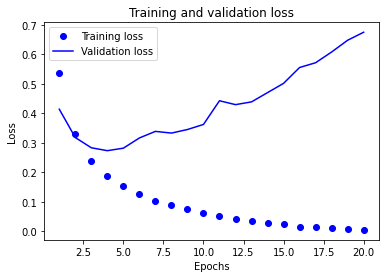

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")       
plt.plot(epochs, val_loss_values, "b", label="Validation loss")  
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

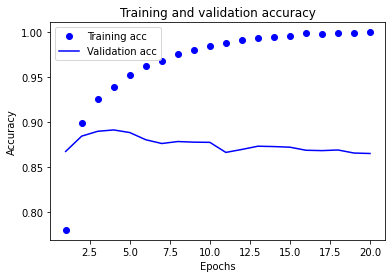

In [ ]:
plt.clf()                           
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In this case, to prevent overfitting, you could stop training after four epochs. In general, you can use a range of techniques to mitigate overfitting, which we’ll cover in chapter 5.

Let’s train a new model from scratch for four epochs and then evaluate it on the test data.

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 20ms/step - loss: 0.4703 - accuracy: 0.8189
Epoch 2/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2679 - accuracy: 0.9084
Epoch 3/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2048 - accuracy: 0.9281
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3002 - accuracy: 0.8812


In [ ]:
results

[0.3001624047756195, 0.8812400102615356]

The first number, 0.29, is the test loss, and the second number, 0.88, is the test accuracy.

This fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, you should be able to get close to 95%.

## 4.1.2. Using the trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

array([[0.17179072],
       [0.99978125],
       [0.6134919 ],
       ...,
       [0.08425489],
       [0.06414258],
       [0.65698844]], dtype=float32)

### 4.1.3. Lesson conclussions

* You usually need to do quite a bit of preprocessing on your raw data in order to be able to feed it—as tensors—into a neural network. Sequences of words can be encoded as binary vectors, but there are other encoding options too.

* Stacks of Dense layers with relu activations can solve a wide range of problems (including sentiment classification), and you’ll likely use them frequently.

* In a binary classification problem (two output classes), your model should end with a Dense layer with one unit and a sigmoid activation: the output of your model should be a scalar between 0 and 1, encoding a probability.

* With such a scalar sigmoid output on a binary classification problem, the loss function you should use is binary_crossentropy.

* The rmsprop optimizer is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about.

* As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they’ve never seen before. Be sure to always monitor performance on data that is outside of the training set.

# 4.2. Classifying newswires: A multiclass classification example

You’ll work with the Reuters dataset, a set of short newswires and their topics, published by Reuters in 1986. It’s a simple, widely used toy dataset for text classification. There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [2]:
len(train_data)

8982

In [3]:
len(test_data)

2246

Each example is a list of integers (word indices):

In [4]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [5]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in     train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## 4.2.1. Preparing the data

In [7]:
import numpy as np 


def vectorize_sequences(sequences, dimension=10000): 
    results = np.zeros((len(sequences), dimension))   
    for i, sequence in enumerate(sequences):
        for j in sequence:
          # The reason because some numbers of the output are zero, it's
          # because we are marking indices of the list, and those indices depends
          # on each value of each list in the input sequence
            results[i, j] = 1.                        
    return results


x_train = vectorize_sequences(train_data)             
x_test = vectorize_sequences(test_data) 

### One hot encoding of labels

In [11]:
train_labels

array([ 3,  4,  3, ..., 25,  3, 25])

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1. 
    return results


y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [12]:
# There is a built-in function that replaces the previous function in Keras:

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

## 4.2.2. Model training

In a stack of Dense layers like those we’ve been using, each layer can only access information present in the output of the previous layer. If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each layer can potentially become an information bottleneck. In the previous example, we used 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, permanently dropping relevant information.

For this reason we’ll use larger layers. Let’s go with 64 units.

In [14]:
from tensorflow import keras 
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

The best loss function to use in this case is categorical_crossentropy. It measures the distance between two probability distributions: here, between the probability distribution output by the model and the true distribution of the labels. 

In [15]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [16]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [17]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 60ms/step - loss: 2.6061 - accuracy: 0.5299 - val_loss: 1.7308 - val_accuracy: 0.6590
Epoch 2/20
16/16 [==============================] - 1s 45ms/step - loss: 1.4291 - accuracy: 0.7065 - val_loss: 1.3102 - val_accuracy: 0.7140
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 1.0662 - accuracy: 0.7726 - val_loss: 1.1704 - val_accuracy: 0.7360
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8481 - accuracy: 0.8178 - val_loss: 1.0388 - val_accuracy: 0.7950
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.6823 - accuracy: 0.8550 - val_loss: 0.9839 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 0.5482 - accuracy: 0.8862 - val_loss: 0.9367 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 1s 45ms/step - loss: 0.4482 - accuracy: 0.9057 - val_loss: 0.9194 - val_accuracy: 0.8100
Epoch 8/20
16

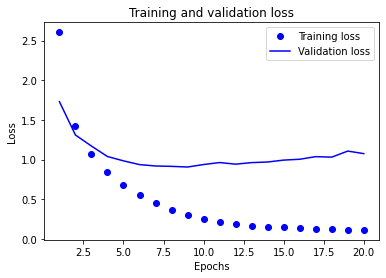

In [19]:
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

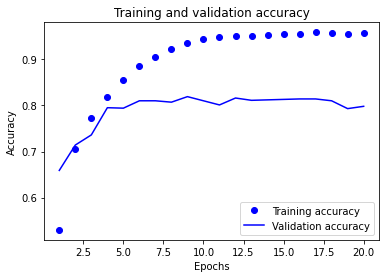

In [22]:
plt.clf()                         
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

The model begins to overfit after nine epochs. Let’s train a new model from scratch for nine epochs and then evaluate it on the test set.

In [23]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 42ms/step - loss: 2.6311 - accuracy: 0.5198
Epoch 2/9
18/18 [==============================] - 1s 41ms/step - loss: 1.4017 - accuracy: 0.7091
Epoch 3/9
18/18 [==============================] - 1s 41ms/step - loss: 1.0277 - accuracy: 0.7839
Epoch 4/9
18/18 [==============================] - 1s 42ms/step - loss: 0.8032 - accuracy: 0.8338
Epoch 5/9
18/18 [==============================] - 1s 42ms/step - loss: 0.6349 - accuracy: 0.8701
Epoch 6/9
18/18 [==============================] - 1s 41ms/step - loss: 0.5056 - accuracy: 0.8952
Epoch 7/9
18/18 [==============================] - 1s 41ms/step - loss: 0.4076 - accuracy: 0.9137
Epoch 8/9
18/18 [==============================] - 1s 42ms/step - loss: 0.3377 - accuracy: 0.9264
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9220 - accuracy: 0.7952


In [25]:
results

[0.9219828248023987, 0.7951914668083191]

This approach reaches an accuracy of ~80%. With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%. But in this case, we have 46 classes, and they may not be equally represented. What would be the accuracy of a random baseline? We could try quickly implementing one to check this empirically:

In [27]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18521816562778273

As you can see, a random classifier would score around 19% classification accuracy, so the results of our model seem pretty good in that light.

## 4.2.4 Generating predictions on new data

In [28]:
predictions = model.predict(x_test)

In [30]:
# Each entry in “predictions” is a vector of length 46:

predictions[0].shape

(46,)

In [31]:
# The coefficients in this vector sum to 1, as they form a probability distribution:

np.sum(predictions[0])

0.99999994

The largest entry is the predicted class—the class with the highest probability:

In [33]:
np.argmax(predictions[0])

3

Now let’s see what happens when we introduce an information bottleneck by having intermediate layers that are significantly less than 46-dimensional: for example, 4-dimensional.

In [34]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 2s 19ms/step - loss: 2.9595 - accuracy: 0.2929 - val_loss: 2.1735 - val_accuracy: 0.5650
Epoch 2/20
63/63 [==============================] - 1s 16ms/step - loss: 1.7436 - accuracy: 0.5728 - val_loss: 1.5382 - val_accuracy: 0.6190
Epoch 3/20
63/63 [==============================] - 1s 16ms/step - loss: 1.3240 - accuracy: 0.6582 - val_loss: 1.3814 - val_accuracy: 0.6600
Epoch 4/20
63/63 [==============================] - 1s 16ms/step - loss: 1.1177 - accuracy: 0.7129 - val_loss: 1.2980 - val_accuracy: 0.6960
Epoch 5/20
63/63 [==============================] - 1s 16ms/step - loss: 0.9867 - accuracy: 0.7521 - val_loss: 1.2656 - val_accuracy: 0.7000
Epoch 6/20
63/63 [==============================] - 1s 16ms/step - loss: 0.8930 - accuracy: 0.7681 - val_loss: 1.2543 - val_accuracy: 0.7240
Epoch 7/20
63/63 [==============================] - 1s 16ms/step - loss: 0.8182 - accuracy: 0.7938 - val_loss: 1.2525 - val_accuracy: 0.7330
Epoch 8/20
63

The model now peaks at ~71% validation accuracy, an 8% absolute drop. This drop is mostly due to the fact that we’re trying to compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate space that is too low-dimensional. The model is able to cram most of the necessary information into these four-dimensional representations, but not all of it.